# Очистка и визуализация данных

## Реестр прокатных удостоверений фильмов

Целью данного блокнота является очистка и подготовка данных Государственного регистра фильмов
, взятых с открытой базы данных сайта Министерства культуры РФ 'https://opendata.mkrf.ru/opendata'

Государственный регистр фильмов — база данных, содержащая информацию о фильмах, получивших прокатные удостоверения. 
Позволяет найти фильм по различных критериям, узнать номер прокатного удостоверения

Начнем с импортирования основых модулей для работы и посмотрим на данный csv файл

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
films_raw = pd.read_csv('films.csv')
print(films_raw.shape)

C:\Users\Marat\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(377230, 48)


Как видно датесэт имеет 48 колонок и 377230 строк.Посмотрим на сэмпл из пяти строк

In [4]:
films_raw.sample(5)

,Название фильма,Hаименование на иностранном языке,Номер удостоверения,Дата регистрации удостоверения,Дата начала показа фильма,Примечание,Идентификатор записи реестра,Аннотация,Вид Фильма,Категория,...,Код,Права проката переданы,Порядковый номер переоформления/продления,Должность подписанта,ФИО подписанта,Запись удалена,Дата удаления записи,Не показывать на сайте mkrf.ru,дата создания объекта,дата обновления объекта
73374,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318988,"МУЛЬТИПЕЛКИ, выпуск № 1",NaN,214015017,2017-10-13T12:00:00.000Z,2017-10-13T12:00:00.000Z,NaN,2.41616e+06,Анимация для детей,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141976,"Салют, Олимпиада!",NaN,214011709,2009-05-28T12:00:00.000Z,2009-05-28T12:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231916,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18348,До суда (1-371 серии),NaN,211047712,2012-12-18T12:00:00.000Z,2012-12-18T12:00:00.000Z,Арест имущества должника - ООО «Кинопром». Пос...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Посмотрим на название серий в сэте
films_raw.columns

Index(['Название фильма', 'Hаименование на иностранном языке',
       'Номер удостоверения', 'Дата регистрации удостоверения',
       'Дата начала показа фильма', 'Примечание',
       'Идентификатор записи реестра', 'Аннотация', 'Вид Фильма', 'Категория',
       'Язык оригинала', 'Формат кадра', 'Количество серий',
       'Метраж (для фильмов на кинопленке)',
       'Количество частей/рулонов (для фильмов на кинопленке)', 'Цвет',
       'Продолжительность демонстрации, часы',
       'Продолжительность демонстрации, минуты', 'Формат носителя',
       'Объем носителя', 'Единица измерения', 'Студия-производитель',
       'Страна производства', 'Год производства', 'Режиссер', 'Художник',
       'Сценарист', 'Оператор', 'Композитор', 'Продюсер',
       'Права на использование фильма',
       'Категория прав на использование фильма',
       'Срок действия прав на использование фильма',
       'Срок действия прав на способ использования фильма',
       'Возрастная категория', 'Возрастная кате

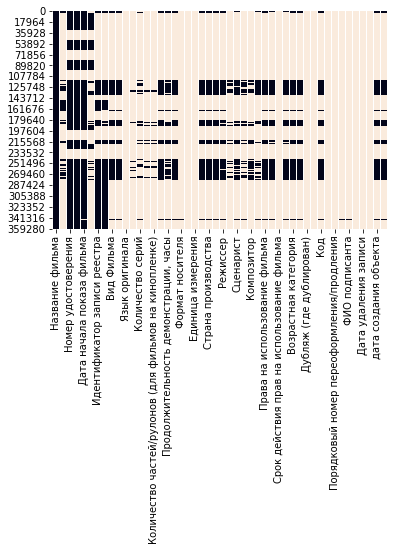

In [6]:
#Визуализируем наличиеfilms_raw недостающих данных
sns.heatmap(films_raw.isnull(), cbar=False)

Так как сет является довольно объемным для понимания и имеет большое количество малоинформативных колонок и пропущенных данных,
то имеет смысл отобрать фильмы за несколько последних лет и удалить ненужные колонки

In [7]:
#отберем фильмы за последние 3 года и только те котырые относятся к категории 'Кино'
films = films_raw[films_raw['Год производства'].isin(['2017','2018','2019'])]
films = films[films['Категория']=='Кино']

In [8]:
#определяем серии с наибольшим количеством пропущенных значений
films.isnull().sum()

Название фильма                                             0
Hаименование на иностранном языке                        1098
Номер удостоверения                                         0
Дата регистрации удостоверения                              0
Дата начала показа фильма                                  14
Примечание                                               1845
Идентификатор записи реестра                                0
Аннотация                                                  25
Вид Фильма                                                  0
Категория                                                   0
Язык оригинала                                           1984
Формат кадра                                             1728
Количество серий                                         1059
Метраж (для фильмов на кинопленке)                       1879
Количество частей/рулонов (для фильмов на кинопленке)    1880
Цвет                                                        1
Продолжи

In [9]:
#Удаляем серии с наибольшим количеством пропущенных значений, устанавливая спец. лимит
films = films.dropna(thresh=1387, axis=1)

In [10]:
#Посмотрим на размерность обновленного сета
films.shape

(1987, 33)

После нескольких преобразований, сет все еще остается трудно воспринимаемым, поэтому удалим серии,имеющие невысокую ценность
для анализа и визуализации

In [11]:
films = films.drop(['Номер удостоверения', 'Дата регистрации удостоверения', 'Идентификатор записи реестра',\
                    'Объем носителя', 'Единица измерения', 'Права на использование фильма',
       'Категория прав на использование фильма',
       'Срок действия прав на способ использования фильма','Возрастная категория.1', 'Код',
       'Должность подписанта', 'ФИО подписанта', 'дата создания объекта',
       'дата обновления объекта'], axis=1)

In [12]:
films.head()

,Название фильма,Дата начала показа фильма,Аннотация,Вид Фильма,Категория,Цвет,"Продолжительность демонстрации, часы","Продолжительность демонстрации, минуты",Формат носителя,Студия-производитель,Страна производства,Год производства,Режиссер,Художник,Сценарист,Оператор,Композитор,Продюсер,Возрастная категория
122447,"Машкины Страшилки. Серия ""Чудовищная правда о ...",2017-06-09T12:00:00.000Z,Детский сериал,Анимационный,Кино,Цветной,0,6,NaN,"ООО Студия ""АНИМАККОРД"" - АНИМАККОРД ЛТД.","Россия, Республика Кипр",2017,Д.Червяцов,И.Трусов,И.Шаров,NaN,А.Друбич,"Д.Ловейко, О.Кузовков",«0+» для любой зрительской аудитории
122448,"Машкины Страшилки. Серия ""Чудовищная правда о ...",2016-04-25T12:00:00.000Z,Детский сериал,Анимационный,Кино,Цветной,0,6,NaN,"ООО Студия ""АНИМАККОРД"" - АНИМАККОРД ЛТД.","Россия, Республика Кипр",2017,Д.Червяцов,NaN,И.Шаров,И.Трусов,А.Друбич,"Д.Ловейко, О.Кузовков",«0+» для любой зрительской аудитории
123422,Анна Каренина. История Вронского,2016-12-29T12:00:00.000Z,"В ролях - Е.Боярская, М.Матвеев, В.Кищенко, К....",Художественный,Кино,Цветной,2,18,NaN,"ФГУП ""Киноконцерн ""Мосфильм""",Россия,2017,К.Шахназаров,"С.Февралев, Ю.Макушина","А.Бузин, К.Шахназаров",А.Кузнецов,Ю.Потеенко,"К.Шахназаров, А.Златопольский",«12+» для детей старше 12 лет
123443,МУЛЬТ в кино. Выпуск № 50,2017-03-21T12:00:00.000Z,Мультсборник,Анимационный,Кино,Цветной,0,47,NaN,"ООО ""Мульт в кино""",Россия,2017,О.Семёнова,NaN,Гизатуллин В.Р.,NaN,"С.Боголюбский, Д.Ставрович",П.Смирнов,«0+» для любой зрительской аудитории
123452,"Анимационный сериал ""Котяткины истории-2""",2017-04-03T12:00:00.000Z,Анимационный детский сериал,Анимационный,Кино,Цветной,0,30,NaN,"ООО ""Студия ""Мастер-Фильм""",Россия,2017,Д.Наумов,О.Добровольский,Д.Наумов,NaN,Р.Нурмухаметова (Р.Нур),А.Герасимов,«0+» для любой зрительской аудитории


Отформатируем некоторые из серий

In [13]:
#Укоротим данные сериии "Дата начала показа" и переведем во временной формат
films['Дата начала показа фильма'].head(2)

122447    2017-06-09T12:00:00.000Z
122448    2016-04-25T12:00:00.000Z
Name: Дата начала показа фильма, dtype: object

In [14]:
films['Дата начала показа фильма'] = pd.to_datetime(films['Дата начала показа фильма'].str[:10])
films['Дата начала показа фильма'].head(2)

122447   2017-06-09
122448   2016-04-25
Name: Дата начала показа фильма, dtype: datetime64[ns]

In [16]:
#Объединим серии продолжительности демонстрации в один
films[['Продолжительность демонстрации, часы','Продолжительность демонстрации, минуты']].sample(3)

,"Продолжительность демонстрации, часы","Продолжительность демонстрации, минуты"
361818,1,29
280122,2,17
362098,1,59


In [18]:
#Для этого переведем обе серии в минуты и сложим между собой
duration_hours_to_min = films['Продолжительность демонстрации, часы'].astype(float,errors='ignore') *60
duration_mins = films['Продолжительность демонстрации, минуты'].astype(float,errors='ignore')
films['Продолжительность демонстрации, минуты'] = duration_hours_to_min + duration_mins
films['Продолжительность демонстрации, минуты'].sample(3)

344650    100.0
345400      8.0
345143     85.0
Name: Продолжительность демонстрации, минуты, dtype: float64

In [19]:
#Посмотрим на формат данных в серии "Вид фильма"
films['Вид Фильма'].value_counts()

 Художественный                   1219
Анимационный                       327
Документальный                     207
Художественный                     106
Прочее (Учебный, Спектакль, …)      82
Научно-популярный                   40
Прочий                               2
Музыкально-развлекательный           1
Документаль��ый                      1
 Художеств��нный                     1
 Анимационный                        1
Name: Вид Фильма, dtype: int64

In [20]:
#Как видно некоторые строки дублируются,однако имеют опечатки. 
#Для редактирования используем функцию map
mapping_dict = {
    ' Художественный': 'Художественный',
    'Анимационный':'Анимационный',
    'Документальный':'Документальный',
    'Прочее (Учебный, Спектакль, …)':'Прочее',
    'Научно-популярный':'Научно-популярный',
    'Прочий':'Прочее',
    ' Художеств��нный':'Художественный',
    ' Анимационный':'Анимационный',
    'Документаль��ый': 'Документальный',
    'Музыкально-развлекательный':'Прочее'}
films['Вид Фильма'] = films['Вид Фильма'].map(mapping_dict)
films['Вид Фильма'].value_counts() #После применения данные выглядят:

Художественный       1220
Анимационный          328
Документальный        208
Прочее                 85
Научно-популярный      40
Name: Вид Фильма, dtype: int64

In [21]:
#Посмотрим на формат данных в серии "Формат носителя"
films['Формат носителя'].value_counts()

HDD                     1283
BETACAM – кассета        174
DVD – диск                70
Жесткий диск DPХ          59
35 мм                     52
BETAKAM – кассета         40
Жесткий диск DPХ          21
HDCAM – кассета           16
Жесткий диск DPX          15
Жесткий диск DCP          12
Жесткий диск              10
DPX                        9
Жесткий диск  DPХ          8
HDCAM                      8
35 мм, жесткий диск        7
HDD, 35 мм                 6
DVD                        5
HD                         4
DCP                        4
Жесткий диск  DPX          2
Digital Betacam            2
35 мм, DCP                 2
Жесткий диск HDD           2
BETACAM                    2
DСP                        1
Blu-Ray                    1
кинопленка/HDD             1
Жесткий диск  HDD          1
HDCAM, DVD                 1
НDD                        1
Betacam Digital            1
DVD - диск                 1
Жесткий диск  DPХ          1
Жесткий диск DCP           1
Жесткий диск D

In [22]:
#Здесь также некоторые строки дублируются по смыслу. 
#Однако уникальных строк слишком много, поэтому имеет смысл написать спец. функцию
import re
def disk_func(l):
    if re.search('HDD',l):  return 'HDD'
    elif re.search('BETA[KC]AM',l):  return 'BETACAM–кассета'
    elif re.search('DVD',l):  return 'DVD'
    elif re.search('DP',l):  return 'DPX'
    elif re.search('DCP',l):  return 'DCP'
    else: return  'Другой'
films['Формат носителя'] = films['Формат носителя'].astype(str) # переводим серию в строковый формат
films['Формат носителя'] = films['Формат носителя'].apply(disk_func)# применяем написанную функцию
films['Формат носителя'].value_counts() #После применения данные выглядят

HDD                1293
Другой              265
BETACAM–кассета     216
DPX                 115
DVD                  77
DCP                  21
Name: Формат носителя, dtype: int64

In [23]:
#Посмотрим на значения в серии 'Возрастная категория'
films[['Возрастная категория']].sample(3)

,Возрастная категория
360511,«6+» для детей старше 6 лет
361382,«16+» для детей старше 16 лет
360714,«18+» запрещено для детей


In [24]:
#Имеет смысл укоротить значение в каждой строке
#Для этого используем встроенный строковый метод в pandas
films['Возрастная категория'] = films['Возрастная категория'].str.extract(r'«(.+)»')
films['Возрастная категория'].sample(3) #После выуживания числового значения из строки:

345304    18+
360679    12+
360654     6+
Name: Возрастная категория, dtype: object

Посля ряда преобразований, снова посмотрим на тепловую карту пропущенных значений

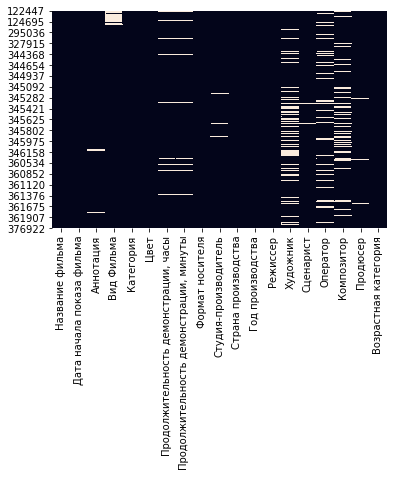

In [25]:
sns.heatmap(films.isnull(), cbar=False)

Как видни из рисунка, в большинстве серий почти отсутствуют пропущенные значений,
кроме некоторых, в которых невозможно заменить без дополнительных источников(имена художников,композиторов,операторов)

### Визуализация данных

Распределение количества фильмов по годам

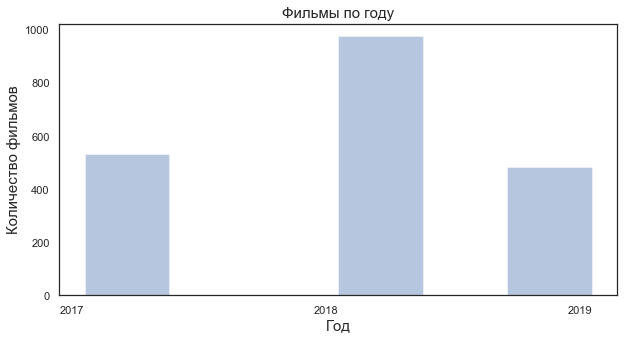

In [26]:
ser = films['Год производства'].astype(int)
sns.set(style="white")
plt.figure(figsize=(10,5))
plt.title('Фильмы по году', size=15)
sns.distplot(ser,bins=6, kde=False)
plt.ylabel('Количество фильмов', size=15)
plt.xlabel('Год',size=15)
plt.xticks(np.arange(2017, 2020, step=1),rotation=360, ha='right')
plt.show()

Распределение фильмов по жанру

Text(0.5, 1.0, 'Фильмы по жанру')

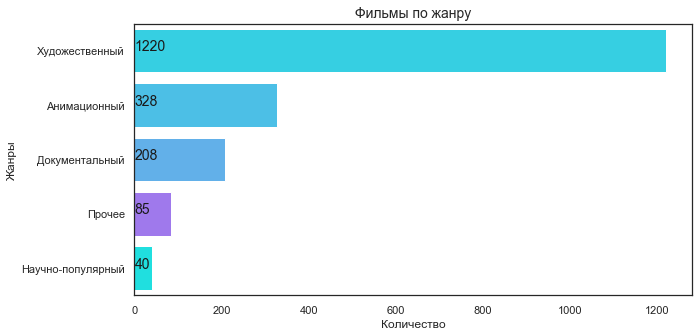

In [27]:
a = plt.cm.cool
plt.figure(figsize=(10,5))
count = films['Вид Фильма'].value_counts()
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.6),a(0.)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Жанры', fontsize=12)
plt.title("Фильмы по жанру", fontsize=14)

Распределение фильмов по стране производства

Text(0.5, 1.0, 'Фильмы по странам производства')

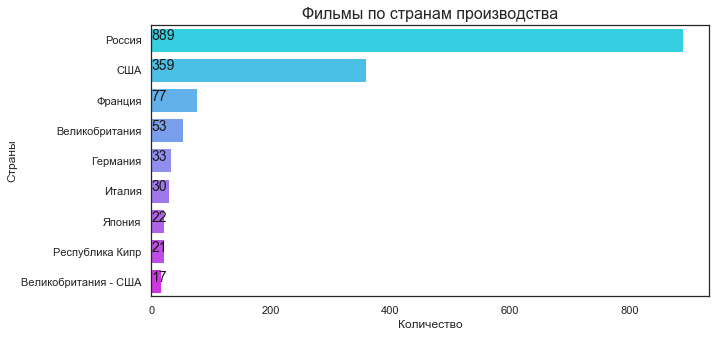

In [28]:
a = plt.cm.cool
plt.figure(figsize=(10,5))
count = films['Страна производства'].value_counts()[:9]
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Страны', fontsize=12)
plt.title("Фильмы по странам производства", fontsize=16)

Распределение фильмов по продолжительности в минутах

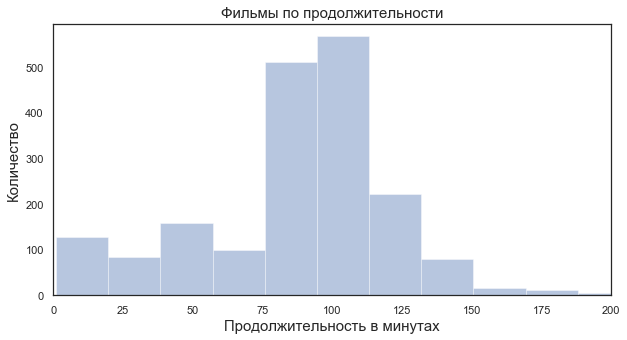

In [31]:
ser = films['Продолжительность демонстрации, минуты']
sns.set(style="white")
plt.figure(figsize=(10,5))
plt.title('Фильмы по продолжительности', size=15)
sns.distplot(ser,bins=50, kde=False)
plt.ylabel('Количество', size=15)
plt.xlabel('Продолжительность в минутах',size=15)
plt.xlim(0,200)
plt.show()

Как видно из графиков, в 2018 году было произведено больше фильмов,чем в предыдущем и последущих годах.Большинство фильмов в сете имеют распространенную для большинства прокатных фильмов продолжительность в 80-120 минут.Самым распространенным жанром в сете является художественный.

In [32]:
films.to_csv('films_clean.csv')